# Import Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Import Dataset

In [10]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Slice Dataset X and Y

In [11]:
X = dataset.iloc[:, [4,5,6]].values
y=dataset['Outcome']
print("X dataset:",X)
print("Y dataset:",y)


X dataset: [[  0.     33.6     0.627]
 [  0.     26.6     0.351]
 [  0.     23.3     0.672]
 ...
 [112.     26.2     0.245]
 [  0.     30.1     0.349]
 [  0.     30.4     0.315]]
Y dataset: 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Using the elbow method to find the optimal number of clusters

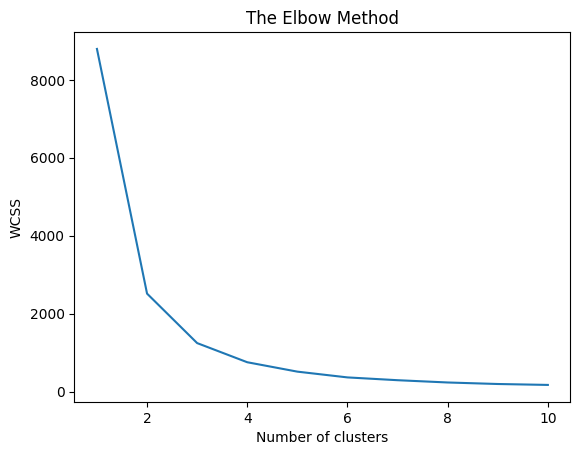

In [14]:
z = dataset.iloc[:, [0, 6]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
y_kmeans = kmeans.fit_predict(z)


# Training the K-Means model on the dataset

In [15]:
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 42)# 
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

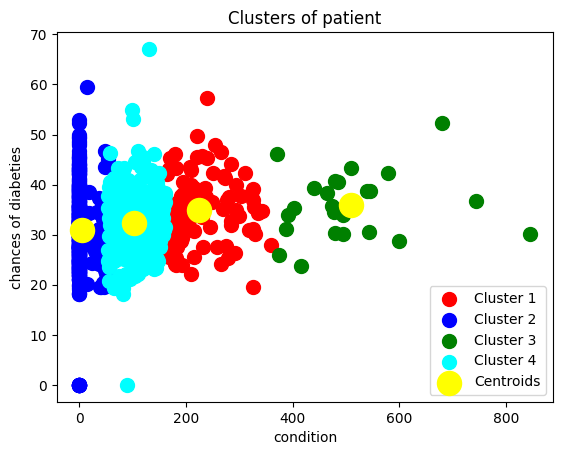

In [16]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of patient')
plt.xlabel('condition')
plt.ylabel('chances of diabeties')
plt.legend()
plt.show()

# Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,y, test_size=0.50, random_state=0)
print("X_train are", X_train)
print("Y_test are", Y_test)

X_train are [[3.42e+02 3.47e+01 7.18e-01]
 [0.00e+00 3.60e+01 5.46e-01]
 [2.10e+02 4.29e+01 5.16e-01]
 ...
 [0.00e+00 2.47e+01 1.48e-01]
 [0.00e+00 3.01e+01 3.00e-01]
 [0.00e+00 0.00e+00 6.40e-01]]
Y_test are 661    1
122    0
113    0
14     1
529    0
      ..
185    1
523    1
353    0
460    0
153    0
Name: Outcome, Length: 384, dtype: int64


# Training the KNeighbors Classifier on the Training set

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
KNN.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=4)

# Predicting the new result for KNN

In [23]:
Ypred1 = KNN.predict(X_test)
Ypred1
print("Prediction:",KNN.predict([[6,148,72]]))

Prediction: [1]


# Making the Confusion Matrix For KNN

[[223  30]
 [103  28]]
Accuracy of KNN:  0.6536458333333334


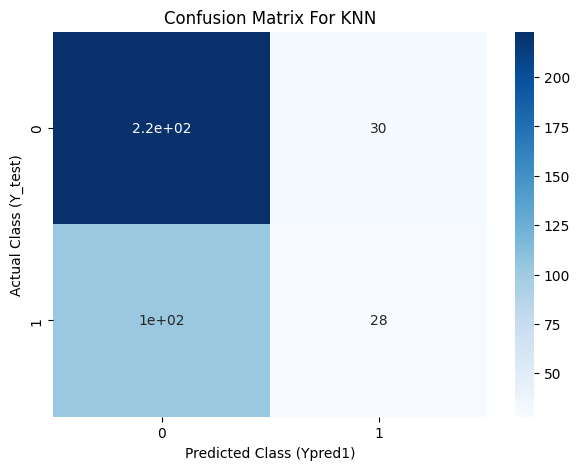

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(Y_test, Ypred1)
print(cm1)
print("Accuracy of KNN: ",accuracy_score(Y_test, Ypred1))

cm = confusion_matrix(Y_test, Ypred1)
cm_df = pd.DataFrame(cm, index = ['0','1'],columns = ['0','1'])

import seaborn as sns
cm = confusion_matrix(Y_test,Ypred1)
cm_df = pd.DataFrame(cm, index = ['0','1'],  columns = ['0','1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df,cmap='Blues', annot=True)
plt.title('Confusion Matrix For KNN')
plt.ylabel('Actual Class (Y_test)')
plt.xlabel('Predicted Class (Ypred1)')
plt.show()

# Evaluating Manual  Precision, Recall and f1-score for KNN


In [25]:

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

recall = (TP/(TP + FN))
precision = (TP/(TP + FP))
print("Recall:",recall)
print("Precision:",precision)
print("F1-score:" ,((2) * ( (recall) * (precision) )/( (recall) + (precision) )))

Recall: 0.21374045801526717
Precision: 0.4827586206896552
F1-score: 0.29629629629629634


# Evaluating  Precision, Recall and f1-score for KNN From Sklearn.metrics


In [27]:
from sklearn.metrics import recall_score,precision_score
print("Accuracy of KNN: ",accuracy_score(Y_test, Ypred1))
recall=recall_score(Y_test, Ypred1)
precision=precision_score(Y_test, Ypred1)
print(f"Recall Rate: {recall}")
print(f"Precision Rate: {precision}")
print("F1-score:" ,((2) * ( (recall) * (precision) )/( (recall) + (precision) )))

Accuracy of KNN:  0.6536458333333334
Recall Rate: 0.21374045801526717
Precision Rate: 0.4827586206896552
F1-score: 0.29629629629629634


# Training the SVM on the Training set

In [28]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

# Predicting the new result for SVM

In [29]:
print(classifier.predict([[6,148,72]]))
ypred2 = classifier.predict(X_test)

[1]


# Making the Confusion Matrix For SVM

[[243  10]
 [119  12]]
Accuracy of SVM:  0.6640625


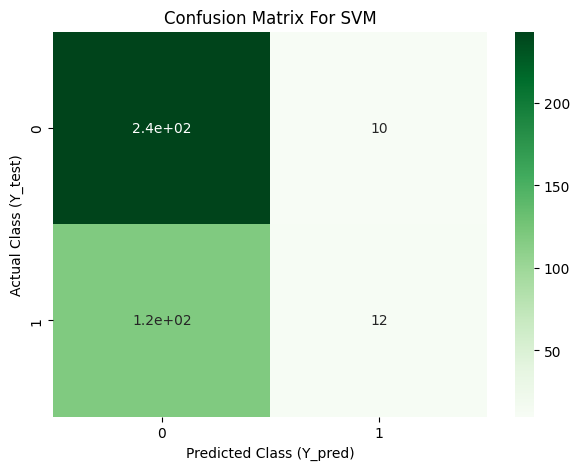

In [31]:
cm = confusion_matrix(Y_test, ypred2)
print(cm)
cm = confusion_matrix(Y_test,ypred2)
cm_df = pd.DataFrame(cm, index = ['0','1'],  columns = ['0','1'])
plt.figure(figsize=(7,5))
sns.heatmap(cm_df,cmap='Greens', annot=True)
plt.title('Confusion Matrix For SVM')
plt.ylabel('Actual Class (Y_test)')
plt.xlabel('Predicted Class (Y_pred)')
plt.show()

# Evaluating  Precision, Recall and f1-score for SVM From Sklearn.metrics


In [44]:
from sklearn.metrics import recall_score,precision_score
recall=recall_score(Y_test, ypred2)
precision=precision_score(Y_test, ypred2)
print("Accuracy of SVM: ",accuracy_score(Y_test, ypred2))
print(f"Recall Rate: {recall}")
print(f"Precision Rate: {precision}")
print("F1-score:" ,((2) * ( (recall) * (precision) )/( (recall) + (precision) )))

Accuracy of SVM:  0.6640625
Recall Rate: 0.0916030534351145
Precision Rate: 0.5454545454545454
F1-score: 0.1568627450980392


# Training the Logistic Regression on the Training set

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

# Predicting the new result for Logistic Regression

In [35]:
print("Prediction: ",classifier.predict([[6,148,72]]))
Ypred3 = classifier.predict(X_test)

Prediction:  [1]


# Confusion Matrix For Logistic Regression

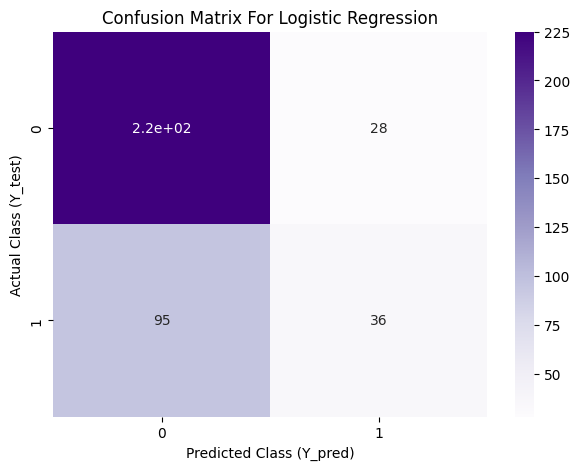

In [269]:
cm = confusion_matrix(Y_test,Ypred3)
cm_df = pd.DataFrame(cm, index = ['0','1'],  columns = ['0','1'])

plt.figure(figsize=(7,5))
sns.heatmap(cm_df,cmap='Purples', annot=True)
plt.title('Confusion Matrix For Logistic Regression')
plt.ylabel('Actual Class (Y_test)')
plt.xlabel('Predicted Class (Y_pred)')
plt.show()

# Evaluating  Precision, Recall and f1-score for Logistic Regresion From Sklearn.metrics


In [46]:
from sklearn.metrics import recall_score,precision_score,accuracy_score
accuracy = accuracy_score(Y_test, Ypred3)
print("Accuracy: ",accuracy_score(Y_test, Ypred3))
recall=recall_score(Y_test, Ypred3)
precision=precision_score(Y_test, Ypred3)
print(f"Recall Rate: {recall}")
print(f"Precision Rate: {precision}")
print("F1-score:" ,((2) * ( (recall) * (precision) )/( (recall) + (precision) )))

Accuracy:  0.6796875
Recall Rate: 0.2748091603053435
Precision Rate: 0.5625
F1-score: 0.36923076923076925


# Training the Decision Tree Classifier on the Training set

In [47]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state=0)
d_tree.fit(X_train,Y_train)
ypred4 = d_tree.predict(X_test)

# Confusion Matrix For Decision Tree Classifier

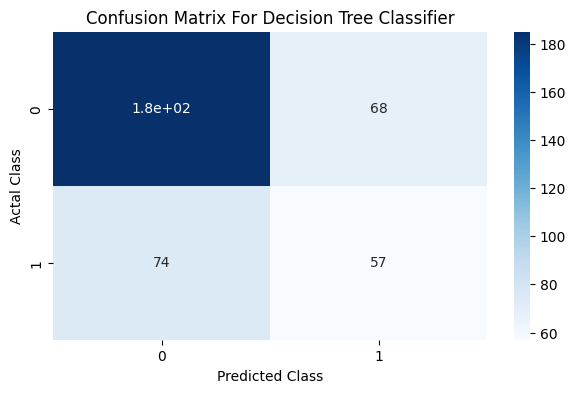

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, ypred4)
cm = confusion_matrix(Y_test, ypred4)
cm_df = pd.DataFrame(cm, index = ['0','1'],columns = ['0','1'])
plt.figure(figsize=(7,4))
sns.heatmap(cm_df,cmap='Blues', annot=True)
plt.title('Confusion Matrix For Decision Tree Classifier')
plt.ylabel('Actal Class')
plt.xlabel('Predicted Class')
plt.show()


# Training Set and Test Set Accuracy 


In [41]:
print("Training Set Accuracy: {}".format(d_tree.score(X_train,Y_train)))
print("Test Set Accuracy: {}".format(d_tree.score(X_test,Y_test)))

Training Set Accuracy: 1.0
Test Set Accuracy: 0.6302083333333334


# Evaluating  Precision, Recall and f1-score for Decision Tree Classifier From Sklearn.metrics


In [49]:
from sklearn.metrics import recall_score,precision_score,accuracy_score
recall=recall_score(Y_test, ypred4)
precision=precision_score(Y_test, ypred4)
accuracy=accuracy_score(Y_test, ypred4)
print("Accuracy:",accuracy)
print(f"Recall Rate: {recall}")
print(f"Precision Rate: {precision}")
print("F1-score:" ,((2) * ( (recall) * (precision) )/( (recall) + (precision) )))

Accuracy: 0.6302083333333334
Recall Rate: 0.4351145038167939
Precision Rate: 0.456
F1-score: 0.44531250000000006


# Import Tree

[Text(0.40299079754601225, 0.9705882352941176, 'X[1] <= 30.85\ngini = 0.459\nsamples = 384\nvalue = [247, 137]'),
 Text(0.15337423312883436, 0.9117647058823529, 'X[1] <= 26.45\ngini = 0.299\nsamples = 164\nvalue = [134, 30]'),
 Text(0.0736196319018405, 0.8529411764705882, 'X[0] <= 136.0\ngini = 0.134\nsamples = 83\nvalue = [77, 6]'),
 Text(0.049079754601226995, 0.7941176470588235, 'X[0] <= 48.5\ngini = 0.101\nsamples = 75\nvalue = [71, 4]'),
 Text(0.03680981595092025, 0.7352941176470589, 'X[0] <= 47.0\ngini = 0.147\nsamples = 50\nvalue = [46, 4]'),
 Text(0.024539877300613498, 0.6764705882352942, 'X[2] <= 0.219\ngini = 0.115\nsamples = 49\nvalue = [46, 3]'),
 Text(0.012269938650306749, 0.6176470588235294, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.03680981595092025, 0.6176470588235294, 'X[2] <= 0.233\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.024539877300613498, 0.5588235294117647, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.049079754601226995, 0.558823529

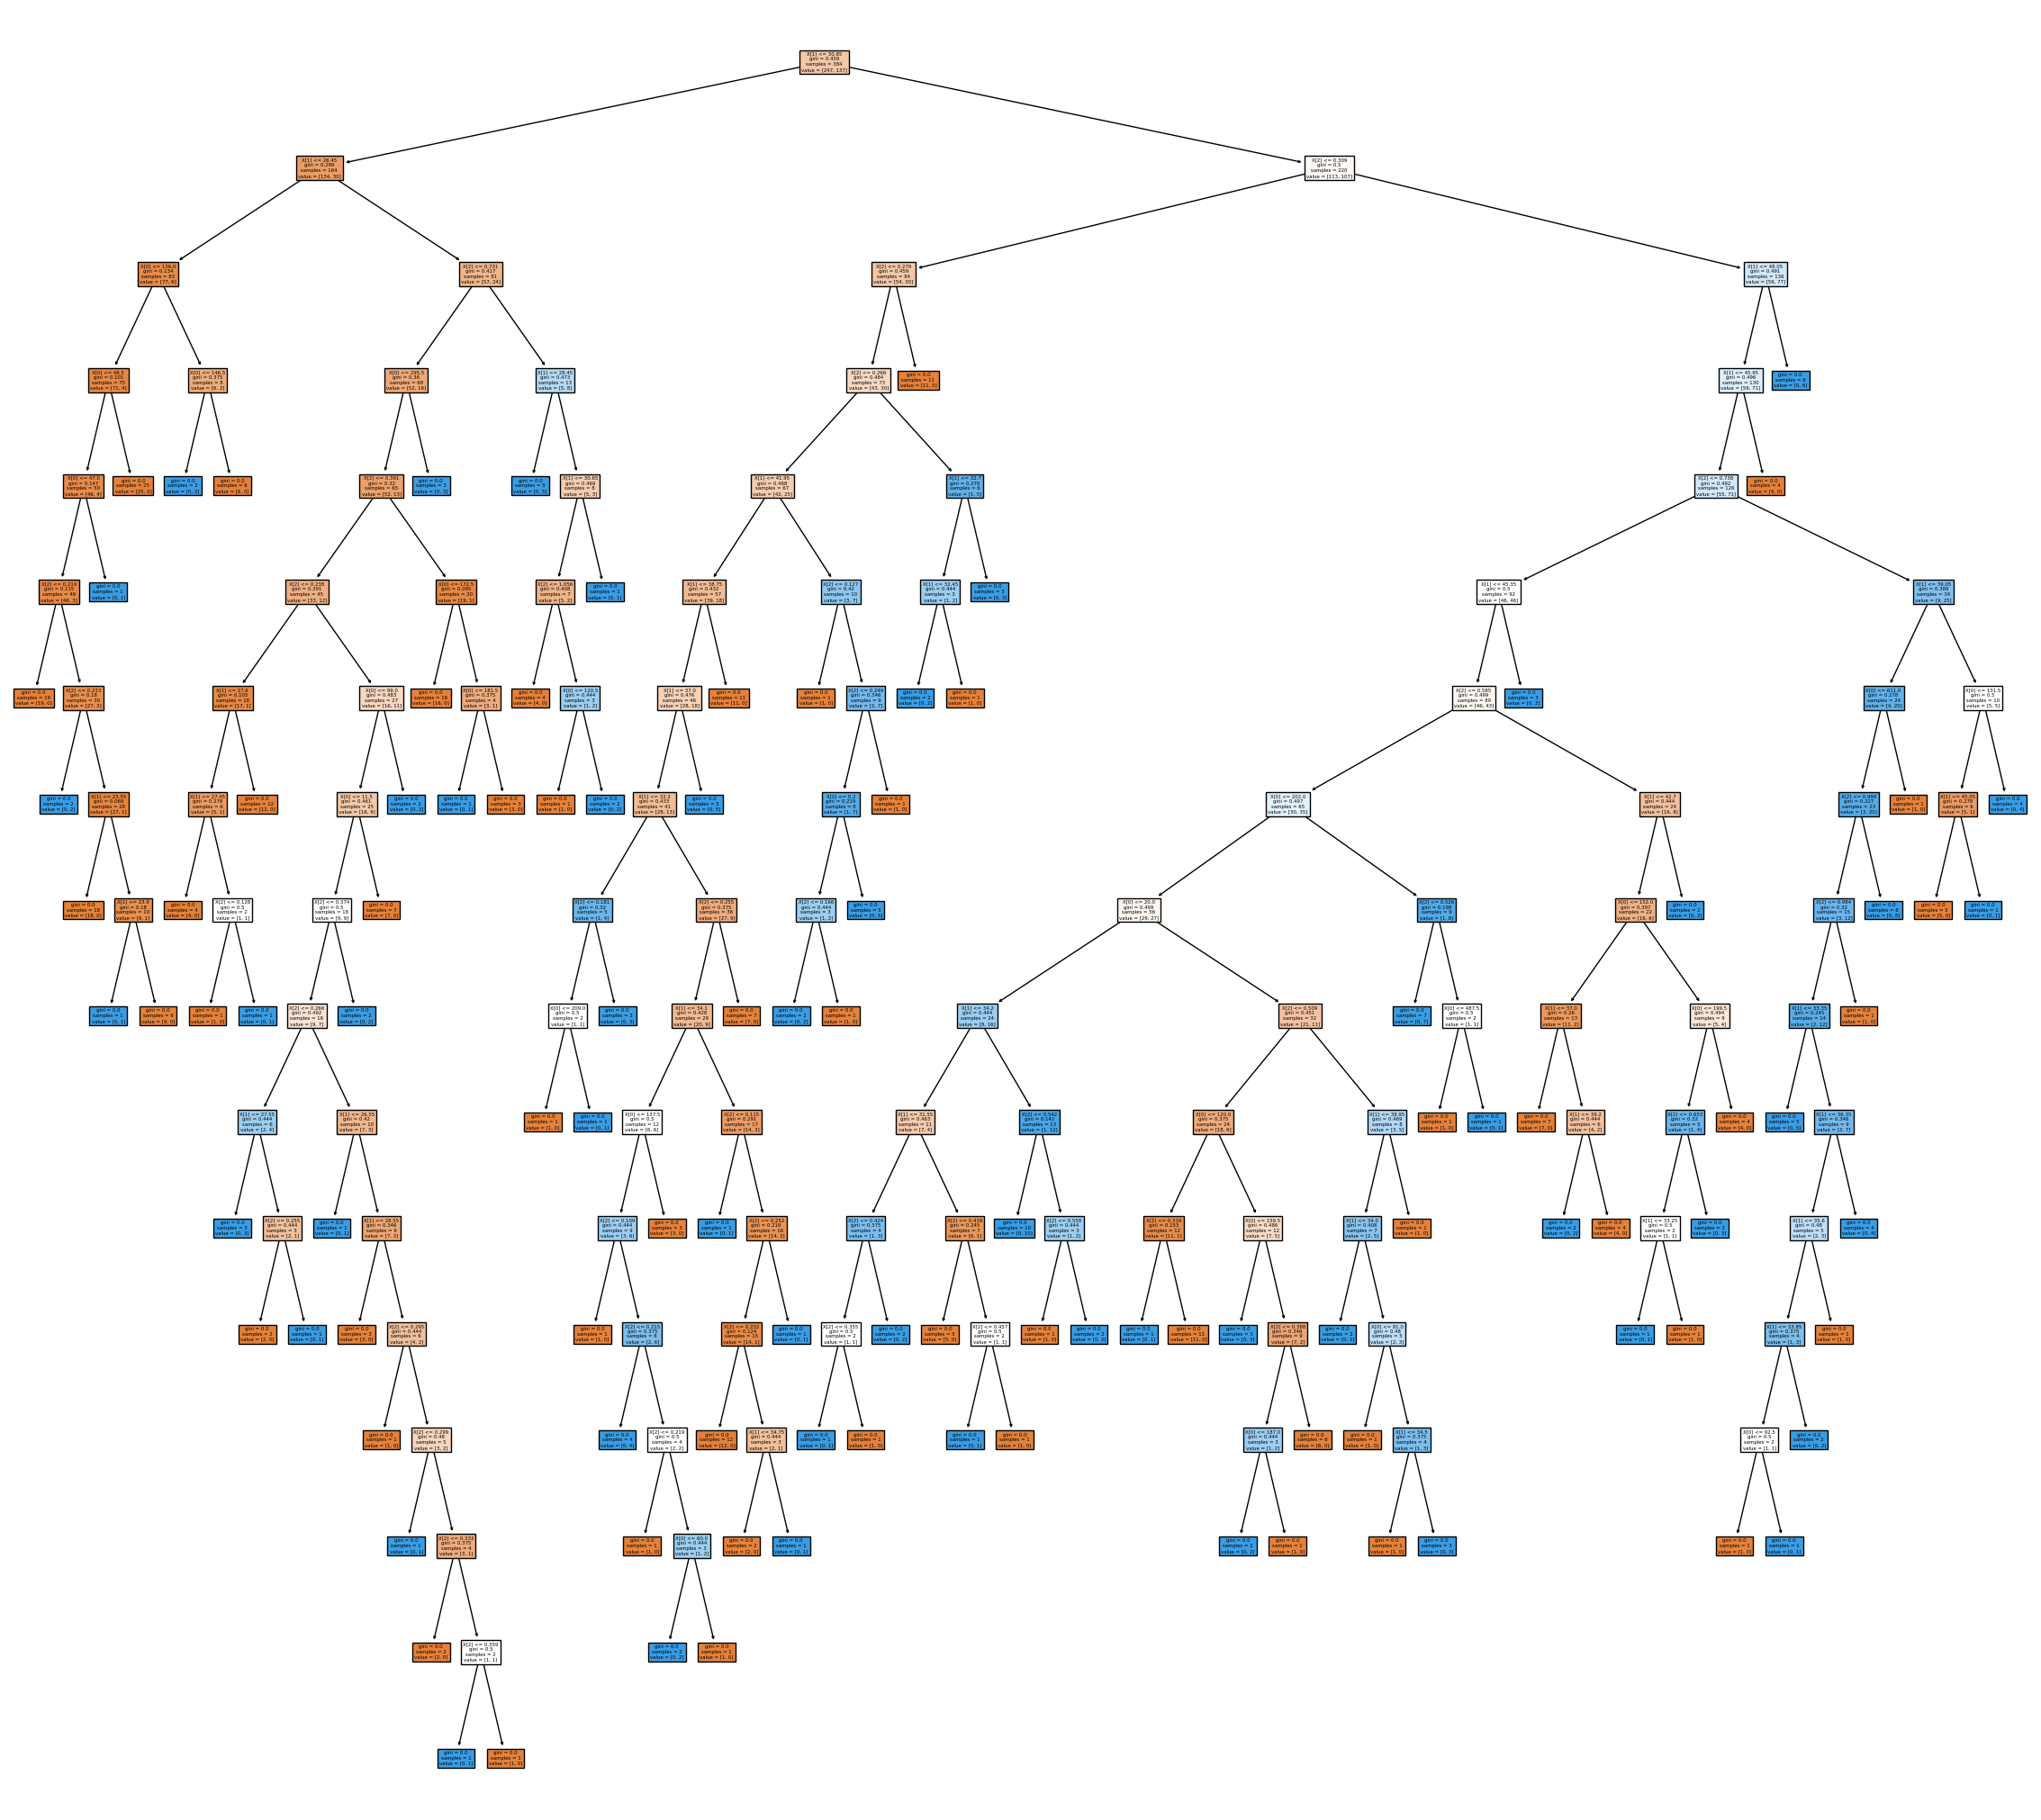

In [50]:
from sklearn import tree
plt.figure(figsize=(29,26))
tree.plot_tree(d_tree,filled=True)